In [1]:
#!for a in /sys/bus/pci/devices/*; do echo 0 | sudo tee -a $a/numa_node; done
import tensorflow as tf
import os
from data_processing import dataset
from models import model
from utils import tools
from plots import plots, edge_detection_plots

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
#np.set_printoptions(threshold=sys.maxsize)

2022-12-14 05:11:37.494334: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-14 05:11:37.581695: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-14 05:11:37.603013: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-14 05:11:37.989157: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
config_directory = 'edge_detection_without_prior'

config_path = os.path.join(os.getcwd(), 'configs', config_directory)
Model = model.Model(config_path)
DataProcessing = dataset.DataProcessing(input_shape_img=Model.cfg["INPUT_SHAPE_IMG"],
                                        output_shape=Model.cfg["OUTPUT_SHAPE"],
                                        config_path=config_path)
tools.parser(Model.cfg, DataProcessing.cfg)
Model.load_data(DataProcessing.cfg["NAME"])
DataProcessing.path_definitions()

MODEL
CKPT
TBLOGS
TFLITE
FIGURES


2022-12-14 05:11:39.059179: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-14 05:11:39.062262: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-14 05:11:39.062350: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-14 05:11:39.062808: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

# Load Dataset, Preprocess Images and Dataset

In [3]:
if Model.train_model:
    train_ds, img_count_train = DataProcessing.load_dataset(DataProcessing.key.train)
test_ds, img_count_test = DataProcessing.load_dataset(DataProcessing.key.test)

img_only_ds, img_count_img_only_ds = DataProcessing.load_dataset(DataProcessing.key.img_only)

#if Model.train_model:
#    for inp, out in train_ds.take(1):
#        edge_detection_plots.plot_edges(images=inp['in_img'], labels=out['out_edge'],
#                                        batch_size=DataProcessing.cfg['TEST']['BATCH_SIZE'],
#                                        num_classes=DataProcessing.num_classes['edge'])

The TRAIN DS contains 1332 images.
The TEST DS contains 300 images.
The IMG_ONLY DS contains 80 images.


# Define, Compile and Train Model

In [4]:
if Model.train_model:
    model = Model.get_neural_network_model(DataProcessing.num_classes['edge'])
    # model.summary()

    lr = Model.get_lr(img_count_train, DataProcessing.cfg['TRAIN']['BATCH_SIZE'])
    model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                  loss=Model.get_loss_function(),
                  metrics=Model.get_metrics(DataProcessing.num_classes['edge']))

    history = model.fit(train_ds, epochs=Model.cfg["EPOCHS"], validation_data=train_ds,
                        callbacks=Model.get_callbacks(), verbose=1)

model = Model.get_best_model_from_checkpoints()

(640, 360, 3)
Epoch 1/80


2022-12-14 05:11:47.676574: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-12-14 05:11:48.426036: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


267/267 [==============================] - 37s 112ms/step - loss: 913.8230 - out_edge_loss: 913.8230 - accuracy: 0.9393 - accuracy_1: 0.9393 - f1: 0.3576 - precision: 0.4895 - recall: 0.2881 - f1_1: 0.3576 - precision_1: 0.4895 - recall_1: 0.2881 - val_loss: 905.7628 - val_out_edge_loss: 905.7628 - val_accuracy: 0.9593 - val_accuracy_1: 0.9593 - val_f1: 0.5907 - val_precision: 0.6385 - val_recall: 0.5495 - val_f1_1: 0.5907 - val_precision_1: 0.6385 - val_recall_1: 0.5495
Epoch 2/80
267/267 [==============================] - 29s 108ms/step - loss: 716.7823 - out_edge_loss: 716.7823 - accuracy: 0.9639 - accuracy_1: 0.9639 - f1: 0.5908 - precision: 0.7209 - recall: 0.5033 - f1_1: 0.5908 - precision_1: 0.7209 - recall_1: 0.5033 - val_loss: 916.9407 - val_out_edge_loss: 916.9407 - val_accuracy: 0.9559 - val_accuracy_1: 0.9559 - val_f1: 0.6513 - val_precision: 0.5638 - val_recall: 0.7711 - val_f1_1: 0.6513 - val_precision_1: 0.5638 - val_recall_1: 0.7711
Epoch 3/80
267/267 [=================

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=568.65-epoch=10.00-f1=0.7367/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=568.65-epoch=10.00-f1=0.7367/assets


267/267 [==============================] - 36s 133ms/step - loss: 550.7473 - out_edge_loss: 550.7473 - accuracy: 0.9728 - accuracy_1: 0.9728 - f1: 0.7138 - precision: 0.7828 - recall: 0.6569 - f1_1: 0.7138 - precision_1: 0.7828 - recall_1: 0.6569 - val_loss: 568.6537 - val_out_edge_loss: 568.6537 - val_accuracy: 0.9722 - val_accuracy_1: 0.9722 - val_f1: 0.7367 - val_precision: 0.7445 - val_recall: 0.7292 - val_f1_1: 0.7367 - val_precision_1: 0.7445 - val_recall_1: 0.7292
Epoch 11/80
267/267 [==============================] - 29s 107ms/step - loss: 550.4056 - out_edge_loss: 550.4056 - accuracy: 0.9728 - accuracy_1: 0.9728 - f1: 0.7325 - precision: 0.7833 - recall: 0.6880 - f1_1: 0.7325 - precision_1: 0.7833 - recall_1: 0.6880 - val_loss: 538.5840 - val_out_edge_loss: 538.5840 - val_accuracy: 0.9730 - val_accuracy_1: 0.9730 - val_f1: 0.7131 - val_precision: 0.8229 - val_recall: 0.6292 - val_f1_1: 0.7131 - val_precision_1: 0.8229 - val_recall_1: 0.6292
Epoch 12/80
267/267 [===============

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=564.53-epoch=20.00-f1=0.7541/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=564.53-epoch=20.00-f1=0.7541/assets


267/267 [==============================] - 36s 133ms/step - loss: 501.1853 - out_edge_loss: 501.1853 - accuracy: 0.9745 - accuracy_1: 0.9745 - f1: 0.7498 - precision: 0.7940 - recall: 0.7109 - f1_1: 0.7498 - precision_1: 0.7940 - recall_1: 0.7109 - val_loss: 564.5283 - val_out_edge_loss: 564.5283 - val_accuracy: 0.9716 - val_accuracy_1: 0.9716 - val_f1: 0.7541 - val_precision: 0.7020 - val_recall: 0.8144 - val_f1_1: 0.7541 - val_precision_1: 0.7020 - val_recall_1: 0.8144
Epoch 21/80
267/267 [==============================] - 29s 107ms/step - loss: 508.0324 - out_edge_loss: 508.0324 - accuracy: 0.9745 - accuracy_1: 0.9745 - f1: 0.7491 - precision: 0.8043 - recall: 0.7010 - f1_1: 0.7491 - precision_1: 0.8043 - recall_1: 0.7010 - val_loss: 496.8621 - val_out_edge_loss: 496.8621 - val_accuracy: 0.9753 - val_accuracy_1: 0.9753 - val_f1: 0.7496 - val_precision: 0.8175 - val_recall: 0.6921 - val_f1_1: 0.7496 - val_precision_1: 0.8175 - val_recall_1: 0.6921
Epoch 22/80
267/267 [===============

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=455.26-epoch=30.00-f1=0.7787/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=455.26-epoch=30.00-f1=0.7787/assets


267/267 [==============================] - 36s 134ms/step - loss: 476.5382 - out_edge_loss: 476.5382 - accuracy: 0.9767 - accuracy_1: 0.9767 - f1: 0.7683 - precision: 0.8159 - recall: 0.7260 - f1_1: 0.7683 - precision_1: 0.8159 - recall_1: 0.7260 - val_loss: 455.2573 - val_out_edge_loss: 455.2573 - val_accuracy: 0.9772 - val_accuracy_1: 0.9772 - val_f1: 0.7787 - val_precision: 0.8091 - val_recall: 0.7504 - val_f1_1: 0.7787 - val_precision_1: 0.8091 - val_recall_1: 0.7504
Epoch 31/80
267/267 [==============================] - 29s 107ms/step - loss: 470.1139 - out_edge_loss: 470.1139 - accuracy: 0.9755 - accuracy_1: 0.9755 - f1: 0.7662 - precision: 0.8122 - recall: 0.7253 - f1_1: 0.7662 - precision_1: 0.8122 - recall_1: 0.7253 - val_loss: 456.2609 - val_out_edge_loss: 456.2609 - val_accuracy: 0.9769 - val_accuracy_1: 0.9769 - val_f1: 0.7793 - val_precision: 0.7944 - val_recall: 0.7648 - val_f1_1: 0.7793 - val_precision_1: 0.7944 - val_recall_1: 0.7648
Epoch 32/80
267/267 [===============

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=474.99-epoch=40.00-f1=0.7462/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=474.99-epoch=40.00-f1=0.7462/assets


267/267 [==============================] - 35s 132ms/step - loss: 453.8813 - out_edge_loss: 453.8813 - accuracy: 0.9767 - accuracy_1: 0.9767 - f1: 0.7733 - precision: 0.8254 - recall: 0.7281 - f1_1: 0.7733 - precision_1: 0.8254 - recall_1: 0.7281 - val_loss: 474.9947 - val_out_edge_loss: 474.9947 - val_accuracy: 0.9763 - val_accuracy_1: 0.9763 - val_f1: 0.7462 - val_precision: 0.8724 - val_recall: 0.6519 - val_f1_1: 0.7462 - val_precision_1: 0.8724 - val_recall_1: 0.6519
Epoch 41/80
267/267 [==============================] - 29s 107ms/step - loss: 452.0180 - out_edge_loss: 452.0180 - accuracy: 0.9765 - accuracy_1: 0.9765 - f1: 0.7685 - precision: 0.8144 - recall: 0.7276 - f1_1: 0.7685 - precision_1: 0.8144 - recall_1: 0.7276 - val_loss: 445.0242 - val_out_edge_loss: 445.0242 - val_accuracy: 0.9778 - val_accuracy_1: 0.9778 - val_f1: 0.7766 - val_precision: 0.8389 - val_recall: 0.7230 - val_f1_1: 0.7766 - val_precision_1: 0.8389 - val_recall_1: 0.7230
Epoch 42/80
267/267 [===============

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=441.23-epoch=50.00-f1=0.7927/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=441.23-epoch=50.00-f1=0.7927/assets


267/267 [==============================] - 35s 132ms/step - loss: 440.3248 - out_edge_loss: 440.3248 - accuracy: 0.9777 - accuracy_1: 0.9777 - f1: 0.7777 - precision: 0.8270 - recall: 0.7345 - f1_1: 0.7777 - precision_1: 0.8270 - recall_1: 0.7345 - val_loss: 441.2258 - val_out_edge_loss: 441.2258 - val_accuracy: 0.9776 - val_accuracy_1: 0.9776 - val_f1: 0.7927 - val_precision: 0.7847 - val_recall: 0.8008 - val_f1_1: 0.7927 - val_precision_1: 0.7847 - val_recall_1: 0.8008
Epoch 51/80
267/267 [==============================] - 29s 107ms/step - loss: 434.7702 - out_edge_loss: 434.7702 - accuracy: 0.9788 - accuracy_1: 0.9788 - f1: 0.7896 - precision: 0.8280 - recall: 0.7547 - f1_1: 0.7896 - precision_1: 0.8280 - recall_1: 0.7547 - val_loss: 427.1668 - val_out_edge_loss: 427.1668 - val_accuracy: 0.9785 - val_accuracy_1: 0.9785 - val_f1: 0.7826 - val_precision: 0.8527 - val_recall: 0.7231 - val_f1_1: 0.7826 - val_precision_1: 0.8527 - val_recall_1: 0.7231
Epoch 52/80
267/267 [===============

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=412.39-epoch=60.00-f1=0.8040/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=412.39-epoch=60.00-f1=0.8040/assets


267/267 [==============================] - 36s 134ms/step - loss: 423.9444 - out_edge_loss: 423.9444 - accuracy: 0.9783 - accuracy_1: 0.9783 - f1: 0.7935 - precision: 0.8312 - recall: 0.7590 - f1_1: 0.7935 - precision_1: 0.8312 - recall_1: 0.7590 - val_loss: 412.3901 - val_out_edge_loss: 412.3901 - val_accuracy: 0.9791 - val_accuracy_1: 0.9791 - val_f1: 0.8040 - val_precision: 0.8062 - val_recall: 0.8019 - val_f1_1: 0.8040 - val_precision_1: 0.8062 - val_recall_1: 0.8019
Epoch 61/80
267/267 [==============================] - 29s 107ms/step - loss: 421.5711 - out_edge_loss: 421.5711 - accuracy: 0.9788 - accuracy_1: 0.9788 - f1: 0.7919 - precision: 0.8293 - recall: 0.7578 - f1_1: 0.7919 - precision_1: 0.8293 - recall_1: 0.7578 - val_loss: 430.8698 - val_out_edge_loss: 430.8698 - val_accuracy: 0.9781 - val_accuracy_1: 0.9781 - val_f1: 0.7689 - val_precision: 0.8815 - val_recall: 0.6819 - val_f1_1: 0.7689 - val_precision_1: 0.8815 - val_recall_1: 0.6819
Epoch 62/80
267/267 [===============

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=401.09-epoch=70.00-f1=0.7976/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=401.09-epoch=70.00-f1=0.7976/assets


267/267 [==============================] - 35s 132ms/step - loss: 409.0440 - out_edge_loss: 409.0440 - accuracy: 0.9796 - accuracy_1: 0.9796 - f1: 0.8024 - precision: 0.8411 - recall: 0.7671 - f1_1: 0.8024 - precision_1: 0.8411 - recall_1: 0.7671 - val_loss: 401.0949 - val_out_edge_loss: 401.0949 - val_accuracy: 0.9798 - val_accuracy_1: 0.9798 - val_f1: 0.7976 - val_precision: 0.8592 - val_recall: 0.7443 - val_f1_1: 0.7976 - val_precision_1: 0.8592 - val_recall_1: 0.7443
Epoch 71/80
267/267 [==============================] - 29s 107ms/step - loss: 404.9324 - out_edge_loss: 404.9324 - accuracy: 0.9800 - accuracy_1: 0.9800 - f1: 0.7949 - precision: 0.8350 - recall: 0.7588 - f1_1: 0.7949 - precision_1: 0.8350 - recall_1: 0.7588 - val_loss: 413.7169 - val_out_edge_loss: 413.7169 - val_accuracy: 0.9792 - val_accuracy_1: 0.9792 - val_f1: 0.7967 - val_precision: 0.8341 - val_recall: 0.7624 - val_f1_1: 0.7967 - val_precision_1: 0.8341 - val_recall_1: 0.7624
Epoch 72/80
267/267 [===============

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=392.82-epoch=80.00-f1=0.8014/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=392.82-epoch=80.00-f1=0.8014/assets


267/267 [==============================] - 36s 134ms/step - loss: 393.0909 - out_edge_loss: 393.0909 - accuracy: 0.9797 - accuracy_1: 0.9797 - f1: 0.8041 - precision: 0.8418 - recall: 0.7696 - f1_1: 0.8041 - precision_1: 0.8418 - recall_1: 0.7696 - val_loss: 392.8165 - val_out_edge_loss: 392.8165 - val_accuracy: 0.9801 - val_accuracy_1: 0.9801 - val_f1: 0.8014 - val_precision: 0.8603 - val_recall: 0.7500 - val_f1_1: 0.8014 - val_precision_1: 0.8603 - val_recall_1: 0.7500
/home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/CKPT/ckpt-loss=412.39-epoch=60.00-f1=0.8040


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/TFLITE/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_without_prior/TFLITE/assets


In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 in_img (InputLayer)            [(None, 640, 360, 3  0           []                               
                                )]                                                                
                                                                                                  
 base_model (Functional)        [(None, 320, 180, 8  4096        ['in_img[0][0]']                 
                                ),                                                                
                                 (None, 160, 90, 8)                                               
                                ]                                                                 
                                                                                              

 concatenate_2 (Concatenate)    (None, 320, 180, 16  0           ['base_model[0][0]',             
                                )                                 'tf.image.resize_3[0][0]']      
                                                                                                  
 tf.math.sigmoid (TFOpLambda)   (None, 6, 4, 2)      0           ['pyramid_avg_relu[0][0]']       
                                                                                                  
 pyramid_1_bn (BatchNormalizati  (None, 80, 45, 3)   12          ['pyramid_1_conv[0][0]']         
 on)                                                                                              
                                                                                                  
 pyramid_2_bn (BatchNormalizati  (None, 80, 45, 3)   12          ['pyramid_2_conv[0][0]']         
 on)                                                                                              
          

 concatenate_3 (Concatenate)    (None, 320, 180, 10  0           ['side_4_conv3x3_relu[0][0]',    
                                )                                 'side_5_conv3x3_relu[0][0]']    
                                                                                                  
 tf.image.resize_2 (TFOpLambda)  (None, 320, 180, 10  0          ['tf.image.resize_1[0][0]']      
                                )                                                                 
                                                                                                  
 side_7_conv1x1_conv (Conv2D)   (None, 320, 180, 10  110         ['concatenate_3[0][0]']          
                                )                                                                 
                                                                                                  
 decoder_1_separable_conv (Sepa  (None, 320, 180, 5)  145        ['tf.image.resize_2[0][0]']      
 rableConv

                                                                                                  
 output_side_concat_0_relu (ReL  (None, 320, 180, 2)  0          ['output_side_concat_0_bn[0][0]']
 U)                                                                                               
                                                                                                  
 concatenate_5 (Concatenate)    (None, 320, 180, 8)  0           ['concatenate_4[0][0]',          
                                                                  'output_decoder_concat_0_relu[0]
                                                                 [0]',                            
                                                                  'output_side_concat_0_relu[0][0]
                                                                 ']                               
                                                                                                  
 out_conca

# Plot Results

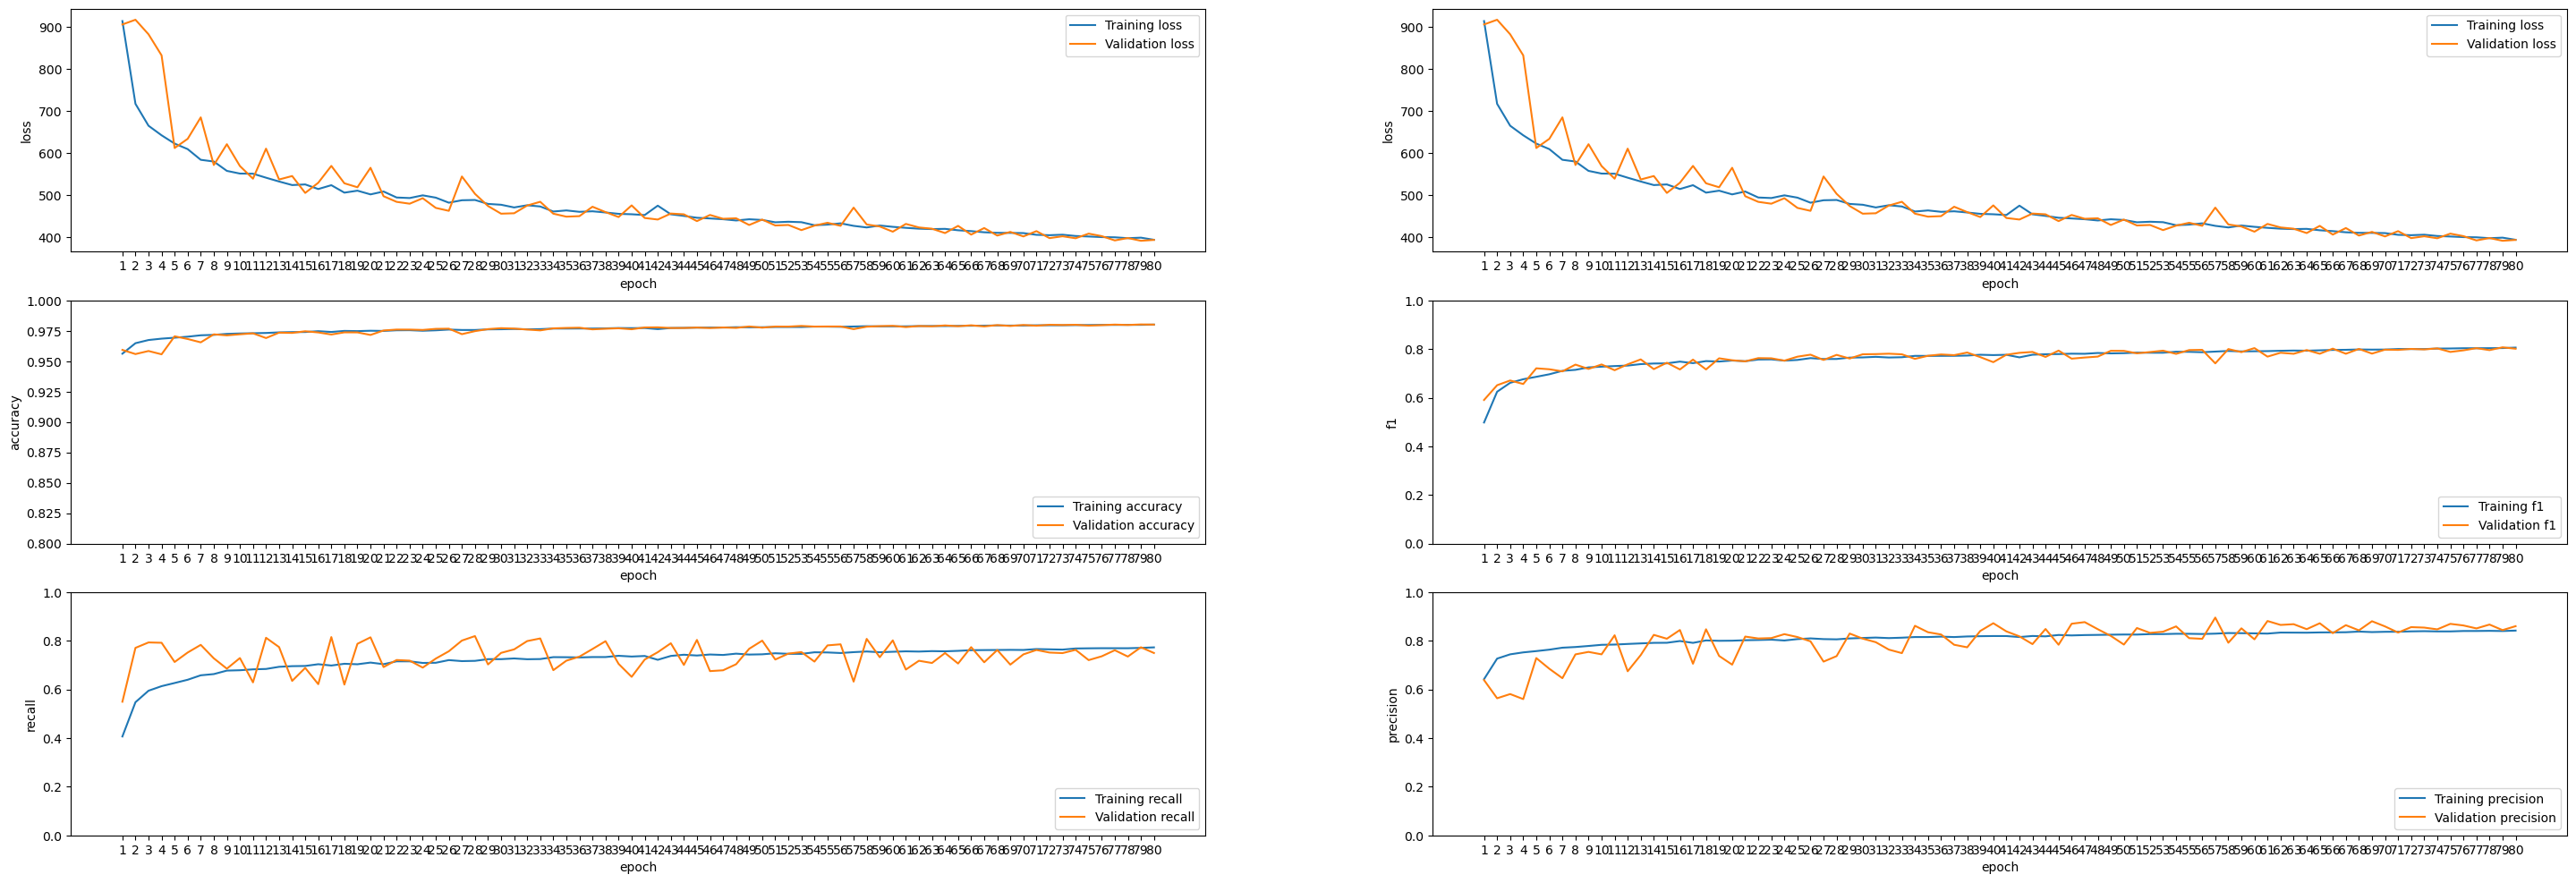

In [6]:
if Model.train_model:
    plot_losses = ["loss", "loss"]
    plot_metrics = ["accuracy", "f1", "recall", "precision"]

    path = os.path.join(Model.Data.paths["FIGURES"], "training.svg")

    plots.plot_training_history(history=history.history, list_of_loss_names=plot_losses,
                                list_of_metric_names=plot_metrics,
                                save=Model.cfg["SAVE"], path=path)

1/1 [==============================] - 0s 51ms/step


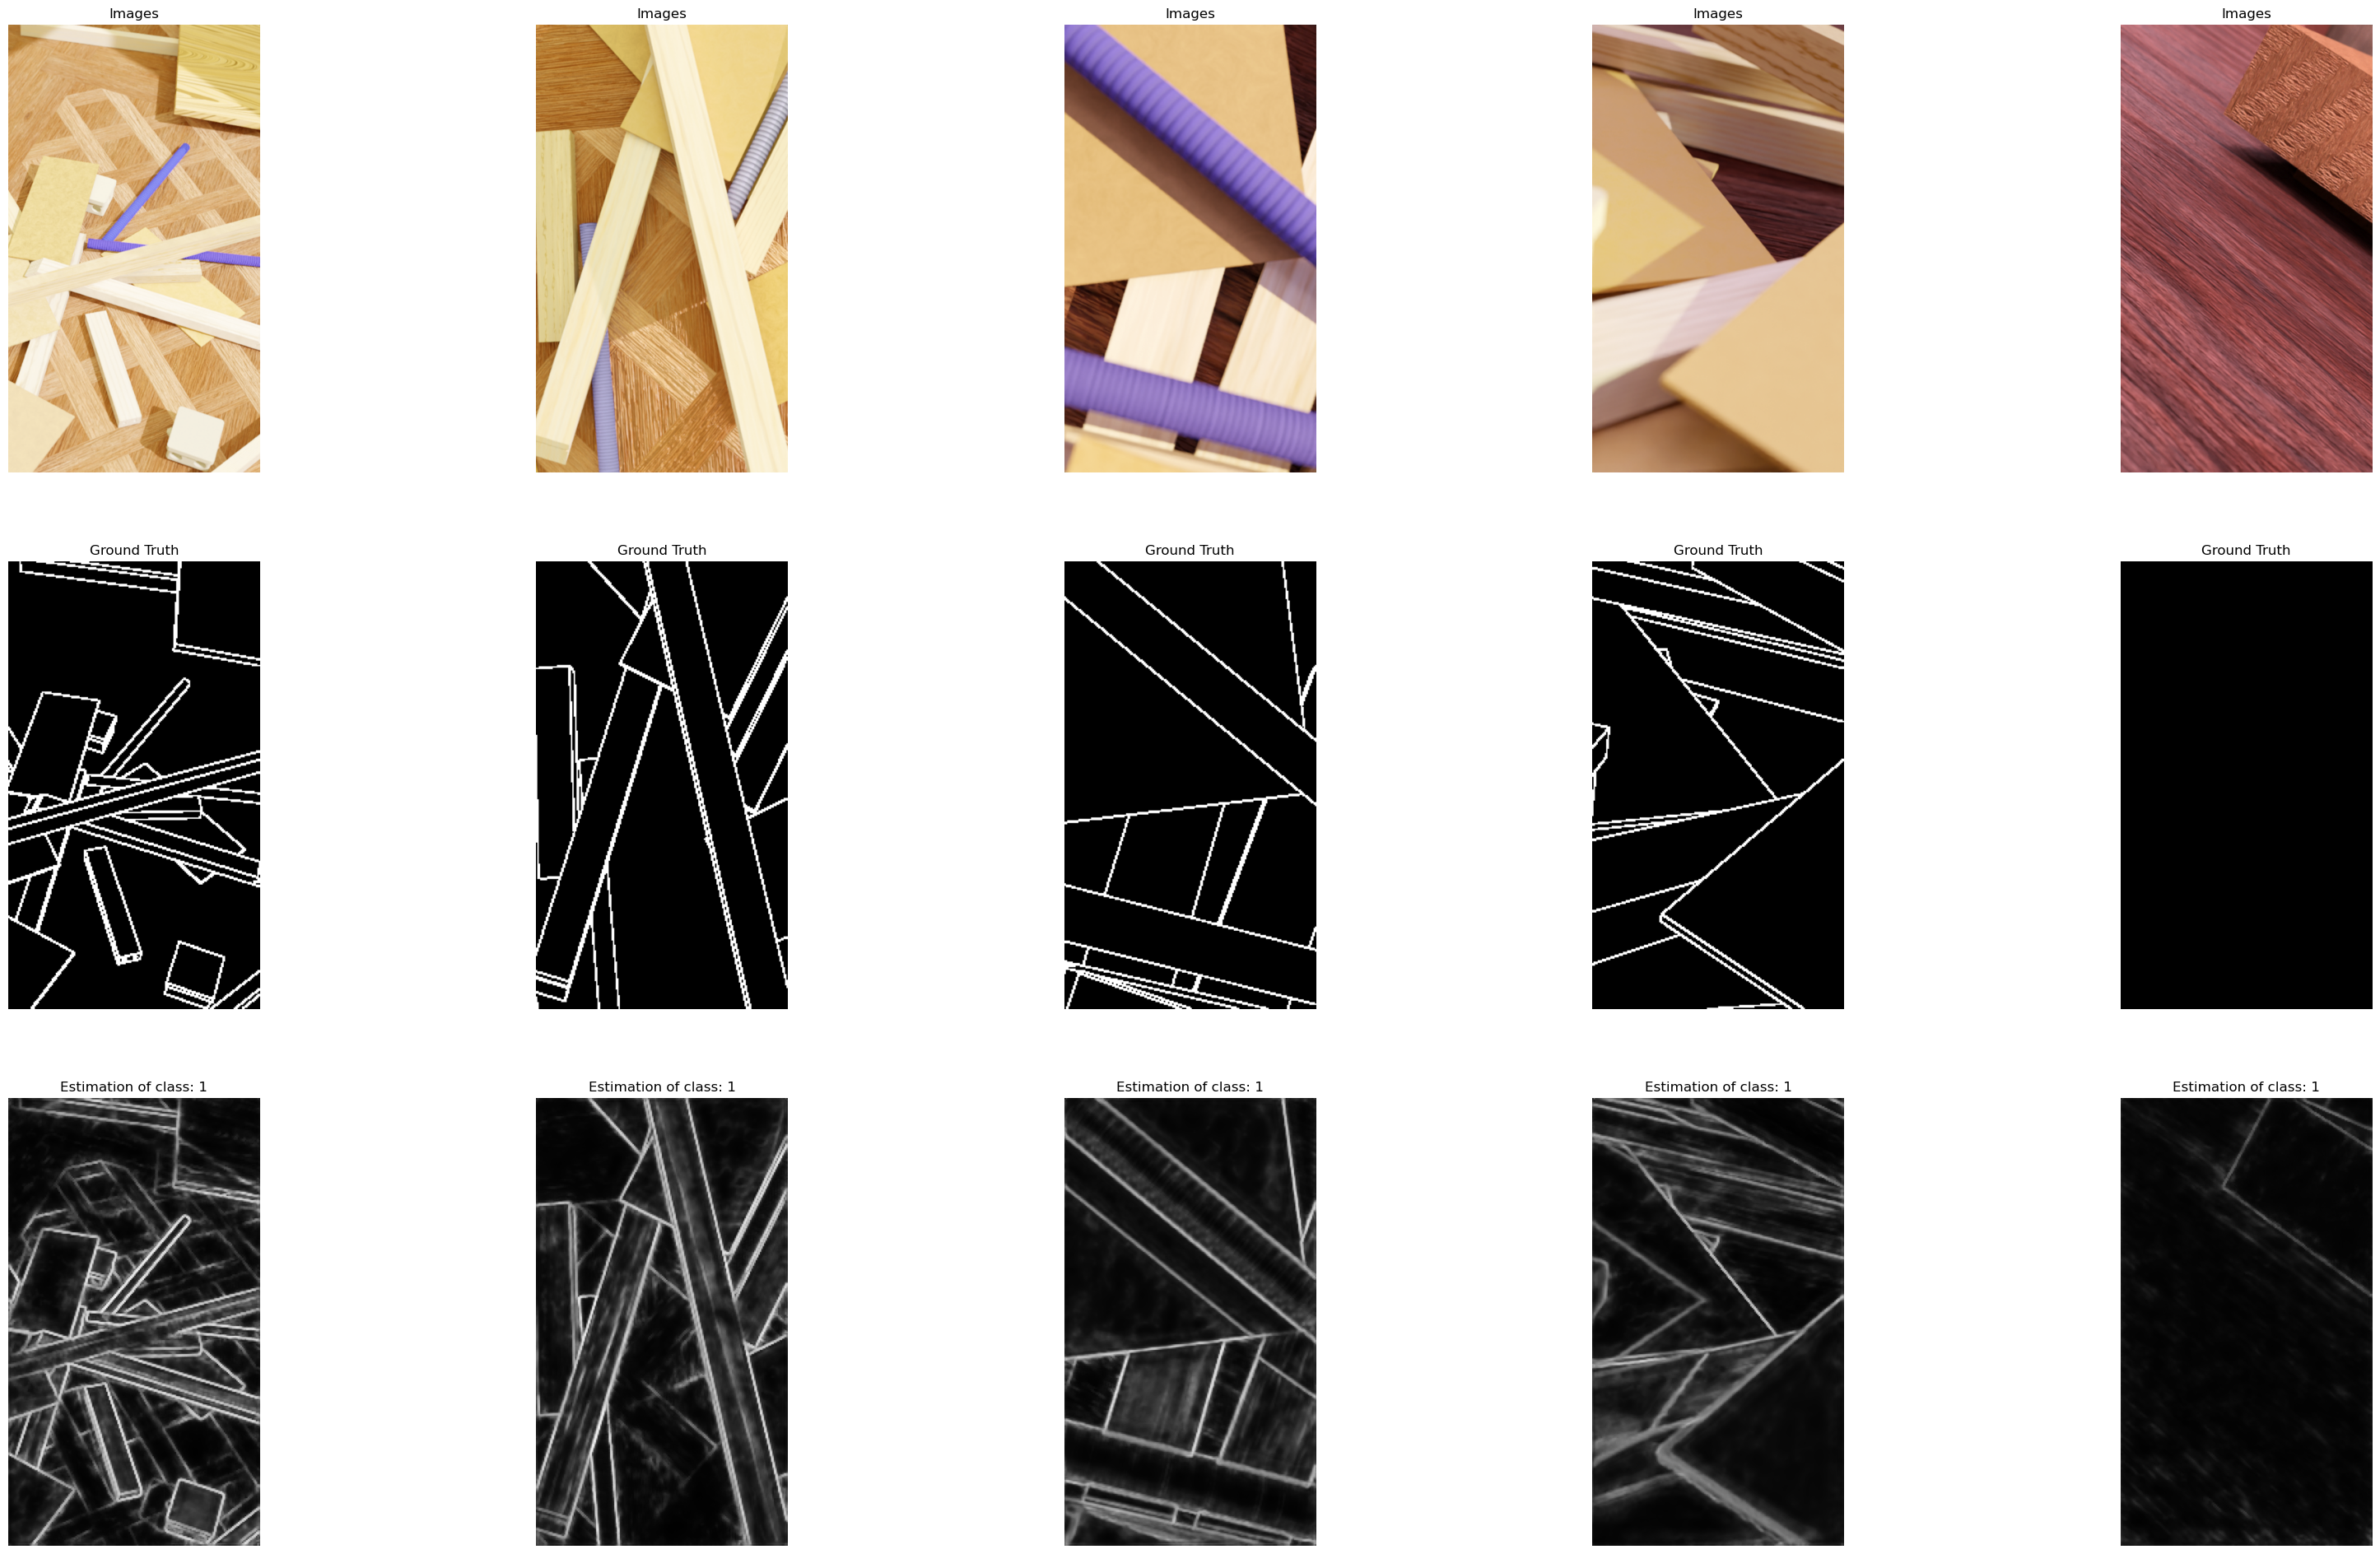

2022-12-14 07:43:03.152919: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [8]:
for inp, out in test_ds.take(1):
    pred = model.predict(inp)
    edge_detection_plots.plot_edges(images=inp['in_img'], labels=out['out_edge'],
                                    predictions=pred[0],
                                    batch_size=DataProcessing.cfg['TEST']['BATCH_SIZE'],
                                    num_classes=DataProcessing.num_classes['edge'])

1/1 [==============================] - 0s 27ms/step


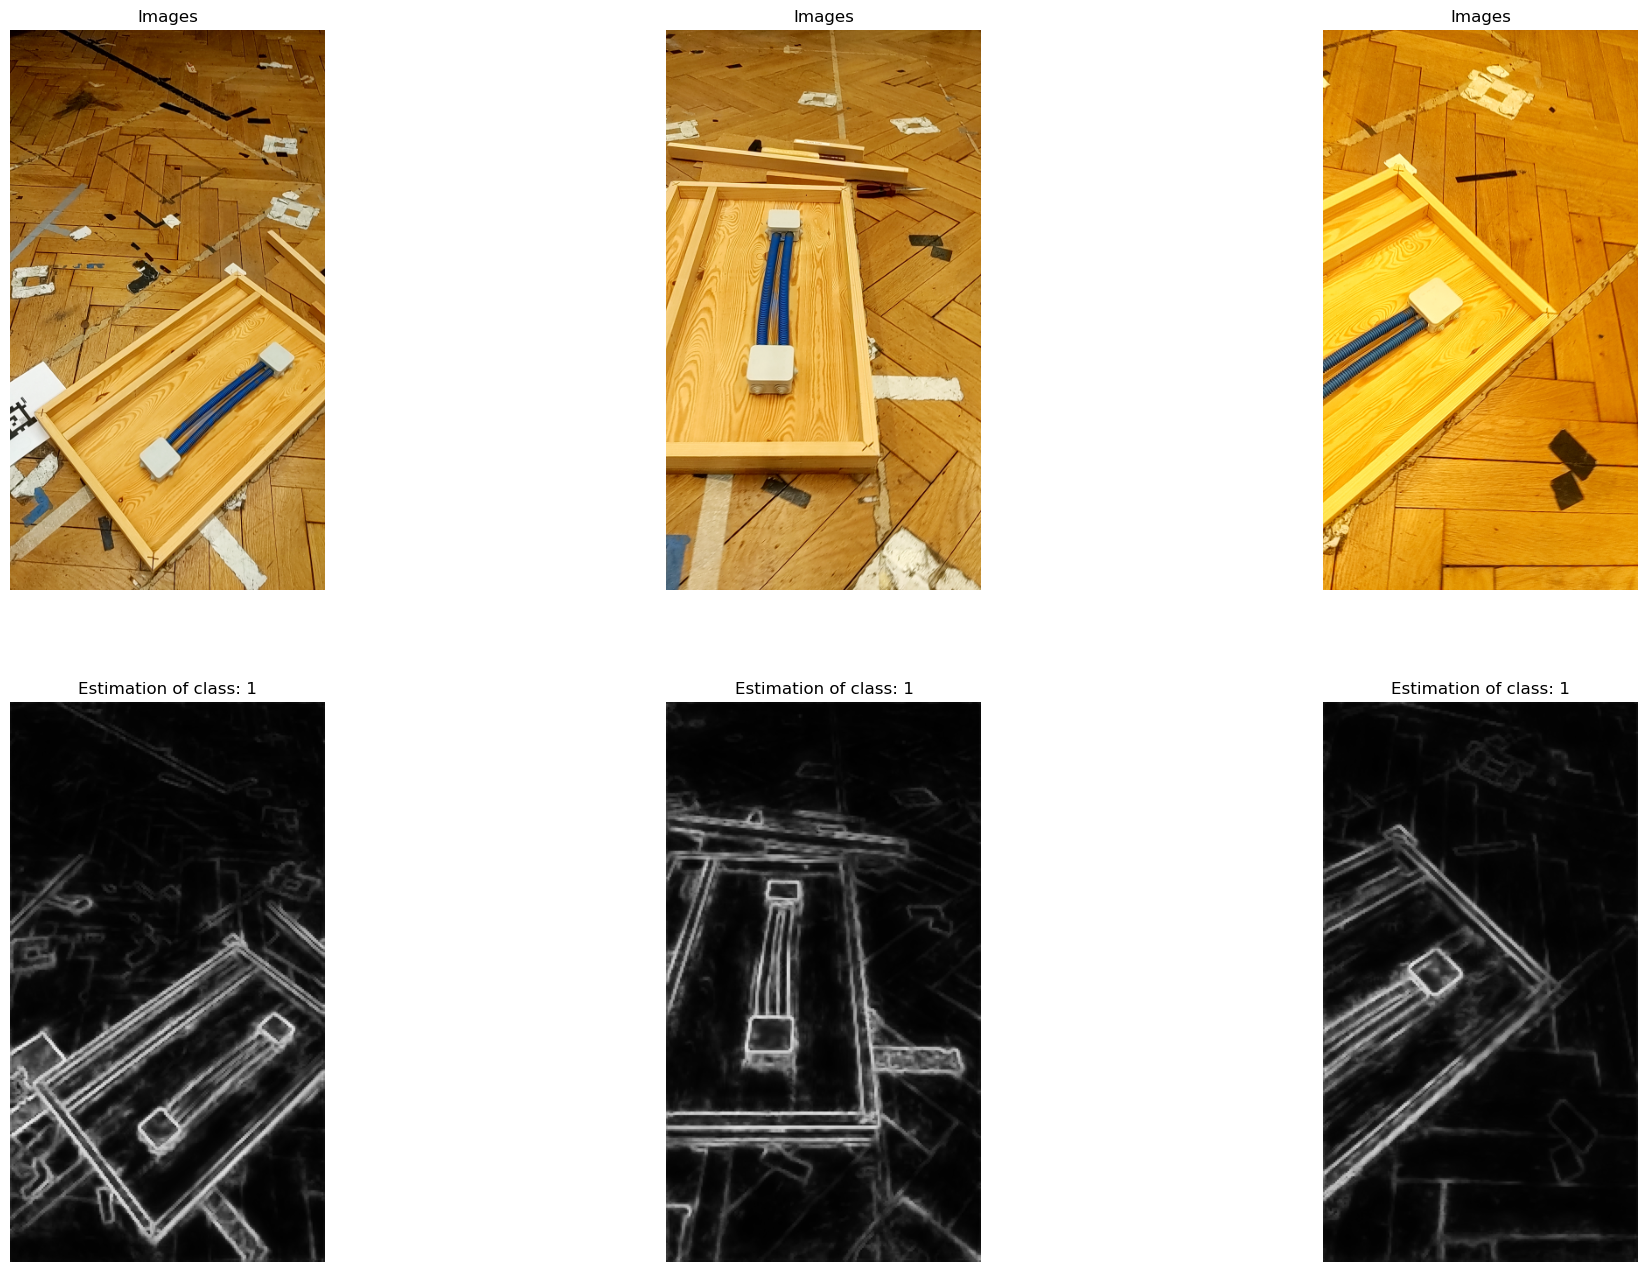

2022-12-14 07:43:32.136469: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [10]:
for inp, out in img_only_ds.take(1):
    pred = model.predict(inp)
    edge_detection_plots.plot_edges(images=inp['in_img'],
                                    predictions=pred[0],
                                    batch_size=DataProcessing.cfg['IMG_ONLY']['BATCH_SIZE'],
                                    num_classes=DataProcessing.num_classes['edge'])

1/1 [==============================] - 0s 50ms/step


2022-12-14 09:19:30.143087: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


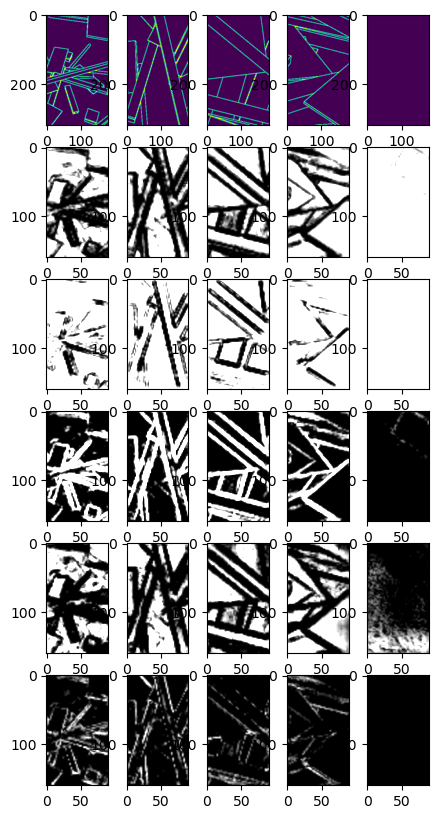

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,10))

output = 1 # pyramid_out
num = 5
batch = 5
for inp, out in test_ds.take(1):
    pred = model.predict(inp)
    out_pred = pred[output]
    for i in range(batch):
        plt.subplot(num+1, batch, i + 1)
        plt.imshow((out["out_edge"][i,:,:,0]))
        for j in range(num):
            plt.subplot(num+1, batch, batch*(1+j) + i + 1)
            plt.imshow(out_pred[i,:,:,j], cmap='gray', vmin=0, vmax=1)
plt.show()

1/1 [==============================] - 0s 49ms/step


2022-12-14 09:20:10.113014: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


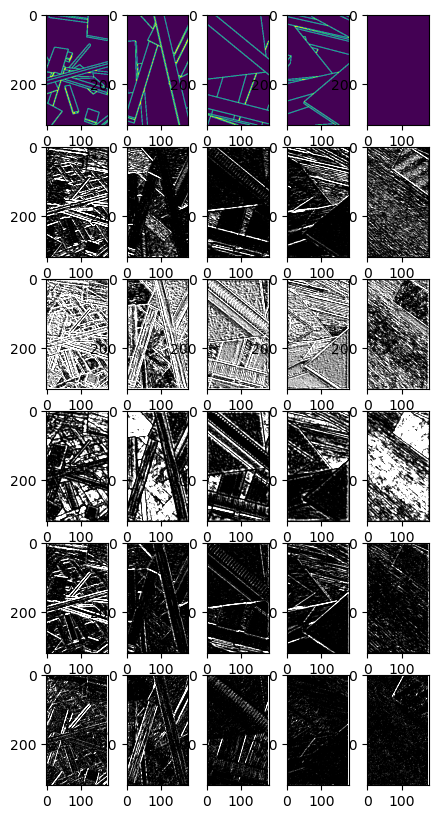

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,10))

output = 2 # image_layer
num = 5
batch = 5
for inp, out in test_ds.take(1):
    pred = model.predict(inp)
    out_pred = pred[output]
    for i in range(batch):
        plt.subplot(num+1, batch, i + 1)
        plt.imshow((out["out_edge"][i,:,:,0]))
        for j in range(num):
            plt.subplot(num+1, batch, batch*(1+j) + i + 1)
            plt.imshow(out_pred[i,:,:,j], cmap='gray', vmin=0, vmax=1)
plt.show()

1/1 [==============================] - 0s 31ms/step


2022-12-14 09:20:45.904575: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


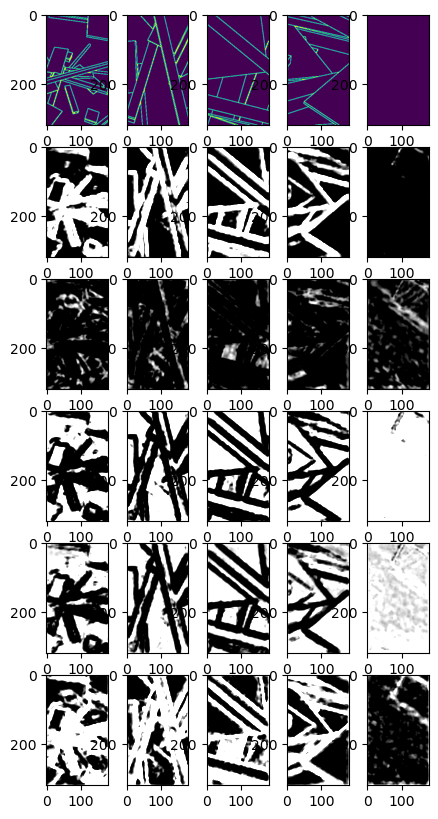

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,10))

output = 3 # decoder
num = 5
batch = 5
for inp, out in test_ds.take(1):
    pred = model.predict(inp)
    out_pred = pred[output]
    for i in range(batch):
        plt.subplot(num+1, batch, i + 1)
        plt.imshow((out["out_edge"][i,:,:,0]))
        for j in range(num):
            plt.subplot(num+1, batch, batch*(1+j) + i + 1)
            plt.imshow(out_pred[i,:,:,j], cmap='gray', vmin=0, vmax=1)
plt.show()

In [ ]:
### Maximum F1 Score:
path_metrics_evaluation_plot = os.path.join(Model.Data.paths["FIGURES"],
                                            "threshold_metrics_evaluation_test_ds.svg")

edge_detection_plots.plot_threshold_metrics_evaluation(model=model, ds=test_ds,
                                                       num_classes=DataProcessing.num_classes['edge'],
                                                       classes_displayed_individually=True,
                                                       save=Model.cfg["SAVE"],
                                                       path=path_metrics_evaluation_plot,
                                                       accuracy_y_lim_min=0.8)


In [ ]:
if Model.cfg["CONVERT_TO_TFLITE"]:
    Model.convert_model_to_tflite(model)